In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
from pandas.io.json._normalize import nested_to_record

%matplotlib inline

In [2]:
username = "lavender"
project_name = "temporal_new_department_performance"
metric_name = "eval/roc_auc"
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs(f"{username}/{project_name}")
summary_list = []
config_list = []
name_list = []
for run in runs:
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files
    summary_list.append(run.summary._json_dict)

    # run.config is the input metrics.
    # We remove special values that start with _.
    conf = nested_to_record(run.config, sep="/")
    config = {k: v for k, v in conf.items() if not k.startswith("_")}
    config_list.append(config)

    # run.name is the name of the run.
    name_list.append(run.name)

import pandas as pd

summary_df = pd.DataFrame.from_records(summary_list)
config_df = pd.DataFrame.from_records(config_list)
name_df = pd.DataFrame({"name": name_list})
data_df = pd.concat([name_df, config_df, summary_df], axis=1)

data_df.to_csv("data/monthly_eval.csv")

In [3]:
plot_df = data_df[["name", metric_name, "department", "oncology"]]
plot_df.oncology = plot_df.oncology.replace(
    {"yes": "oncology subspecialty", "no": "None-oncology"}
)

/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_81784/555089319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df.oncology = plot_df.oncology.replace({


In [4]:
plot_df

,name,eval/roc_auc,department,oncology
0,Otolaryngology-no,0.754427,Otolaryngology,None-oncology
1,Psychiatry-no,0.681243,Psychiatry,None-oncology
2,Plastic_Surgery-no,0.780942,Plastic_Surgery,None-oncology
3,Unspecified-no,0.705357,Unspecified,None-oncology
4,Rehabilitation-no,0.818838,Rehabilitation,None-oncology
5,Emergency_Medicine-no,0.744887,Emergency_Medicine,None-oncology
6,Urology-no,0.752208,Urology,None-oncology
7,Urology-yes,0.656013,Urology,oncology subspecialty
8,Neurology-no,0.901154,Neurology,None-oncology
9,CT_Surgery-no,0.831779,CT_Surgery,None-oncology


In [5]:
plot_df.name.isin(["Emergency_Medicine-no"])

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: name, dtype: bool

In [6]:
keep_names = [
    "Medicine-no",
    "Pediatrics-no",
    "Ob_Gyn-no",
    "Surgery-no",
    "Neurology-no",
    "Orthopedic_Surgery-no",
    "Emergency_Medicine-no",
    "Neurosurgery-no",
    "CT_Surgery-no",
    "Rehabilitation-no",
    "Psychiatry-no",
    "Urology-no",
    "Medicine-yes",
    "Plastic_Surgery-no",
    "Ob_Gyn-yes",
    "Pediatrics-yes",
    "Urology-yes",
    "Otolaryngology-no",
]
print(len(keep_names))

18


In [7]:
plot_df = plot_df[plot_df.name.isin(keep_names)]
plot_df["name"] = pd.Categorical(plot_df["name"], keep_names)
plot_df = plot_df.sort_values(by="name")
print(len(plot_df))
print(plot_df)

18
                     name  eval/roc_auc          department  \
19            Medicine-no      0.679547            Medicine   
11          Pediatrics-no      0.762728          Pediatrics   
17              Ob_Gyn-no      0.780609              Ob_Gyn   
15             Surgery-no      0.735400             Surgery   
8            Neurology-no      0.901154           Neurology   
13  Orthopedic_Surgery-no      0.781114  Orthopedic_Surgery   
5   Emergency_Medicine-no      0.744887  Emergency_Medicine   
14        Neurosurgery-no      0.788342        Neurosurgery   
9           CT_Surgery-no      0.831779          CT_Surgery   
4       Rehabilitation-no      0.818838      Rehabilitation   
1           Psychiatry-no      0.681243          Psychiatry   
6              Urology-no      0.752208             Urology   
20           Medicine-yes      0.637704            Medicine   
2      Plastic_Surgery-no      0.780942     Plastic_Surgery   
18             Ob_Gyn-yes      0.701130             

/var/folders/5v/561pm5gx1h9fgr_77mp6091m0000gn/T/ipykernel_81784/3368928635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['name'] = pd.Categorical(plot_df['name'], keep_names)


In [8]:
# update count and readmission rate
plot_df["count"] = [
    18702,
    9856,
    8094,
    6046,
    1936,
    1802,
    1167,
    1072,
    926,
    904,
    753,
    538,
    481,
    260,
    204,
    168,
    155,
    135,
]
plot_df["readmit_rate"] = [
    0.1697144690407443,
    0.03216314935064935,
    0.024215468248085,
    0.12041018855441614,
    0.1621900826446281,
    0.06881243063263041,
    0.12767780634104542,
    0.2294776119402985,
    0.1511879049676026,
    0.17146017699115043,
    0.06241699867197875,
    0.08178438661710037,
    0.33471933471933474,
    0.04230769230769231,
    0.0784313725490196,
    0.4107142857142857,
    0.08387096774193549,
    0.1037037037037037,
]
plot_df["readmission_rate"] = plot_df["readmit_rate"].apply(lambda x: f"{100*x:10.2f}%")
plot_df

,name,eval/roc_auc,department,oncology,count,readmit_rate,readmission_rate
19,Medicine-no,0.679547,Medicine,None-oncology,18702,0.169714,16.97%
11,Pediatrics-no,0.762728,Pediatrics,None-oncology,9856,0.032163,3.22%
17,Ob_Gyn-no,0.780609,Ob_Gyn,None-oncology,8094,0.024215,2.42%
15,Surgery-no,0.735400,Surgery,None-oncology,6046,0.120410,12.04%
8,Neurology-no,0.901154,Neurology,None-oncology,1936,0.162190,16.22%
13,Orthopedic_Surgery-no,0.781114,Orthopedic_Surgery,None-oncology,1802,0.068812,6.88%
5,Emergency_Medicine-no,0.744887,Emergency_Medicine,None-oncology,1167,0.127678,12.77%
14,Neurosurgery-no,0.788342,Neurosurgery,None-oncology,1072,0.229478,22.95%
9,CT_Surgery-no,0.831779,CT_Surgery,None-oncology,926,0.151188,15.12%
4,Rehabilitation-no,0.818838,Rehabilitation,None-oncology,904,0.171460,17.15%


In [9]:
plot_df = plot_df.sort_values(by=metric_name, ascending=False)

In [10]:
plot_df

,name,eval/roc_auc,department,oncology,count,readmit_rate,readmission_rate
8,Neurology-no,0.901154,Neurology,None-oncology,1936,0.162190,16.22%
9,CT_Surgery-no,0.831779,CT_Surgery,None-oncology,926,0.151188,15.12%
4,Rehabilitation-no,0.818838,Rehabilitation,None-oncology,904,0.171460,17.15%
14,Neurosurgery-no,0.788342,Neurosurgery,None-oncology,1072,0.229478,22.95%
13,Orthopedic_Surgery-no,0.781114,Orthopedic_Surgery,None-oncology,1802,0.068812,6.88%
2,Plastic_Surgery-no,0.780942,Plastic_Surgery,None-oncology,260,0.042308,4.23%
17,Ob_Gyn-no,0.780609,Ob_Gyn,None-oncology,8094,0.024215,2.42%
12,Pediatrics-yes,0.775143,Pediatrics,oncology subspecialty,168,0.410714,41.07%
11,Pediatrics-no,0.762728,Pediatrics,None-oncology,9856,0.032163,3.22%
0,Otolaryngology-no,0.754427,Otolaryngology,None-oncology,135,0.103704,10.37%


In [11]:
print(list(plot_df.name))

['Neurology-no', 'CT_Surgery-no', 'Rehabilitation-no', 'Neurosurgery-no', 'Orthopedic_Surgery-no', 'Plastic_Surgery-no', 'Ob_Gyn-no', 'Pediatrics-yes', 'Pediatrics-no', 'Otolaryngology-no', 'Urology-no', 'Emergency_Medicine-no', 'Surgery-no', 'Ob_Gyn-yes', 'Psychiatry-no', 'Medicine-no', 'Urology-yes', 'Medicine-yes']


In [12]:
non_onc_order = [
    "Neurology-no",
    "CT_Surgery-no",
    "Rehabilitation-no",
    "Neurosurgery-no",
    "Orthopedic_Surgery-no",
    "Plastic_Surgery-no",
    "Ob_Gyn-no",
    "Pediatrics-no",
    "Otolaryngology-no",
    "Urology-no",
    "Emergency_Medicine-no",
    "Surgery-no",
    "Psychiatry-no",
    "Medicine-no",
]

oncology_order = len(non_onc_order) * [""]
oncology_order[6] = "Ob_Gyn-yes"
oncology_order[7] = "Pediatrics-yes"
oncology_order[9] = "Urology-yes"
oncology_order[13] = "Medicine-yes"

plot_order = non_onc_order + oncology_order
ann_cnts = []
ann_rate = []
for name in plot_order:
    if name == "":
        cnt = -1
        rate = -1
    else:
        cnt = list(plot_df.loc[plot_df.name == name, "count"])[0]
        rate = list(plot_df.loc[plot_df.name == name, "readmission_rate"])[0]
    ann_cnts.append(cnt)
    ann_rate.append(rate)

print(len(ann_cnts), len(ann_rate))

28 28


In [13]:
len(plot_df)

18

/Users/lavender/opt/anaconda3/envs/ds/lib/python3.10/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


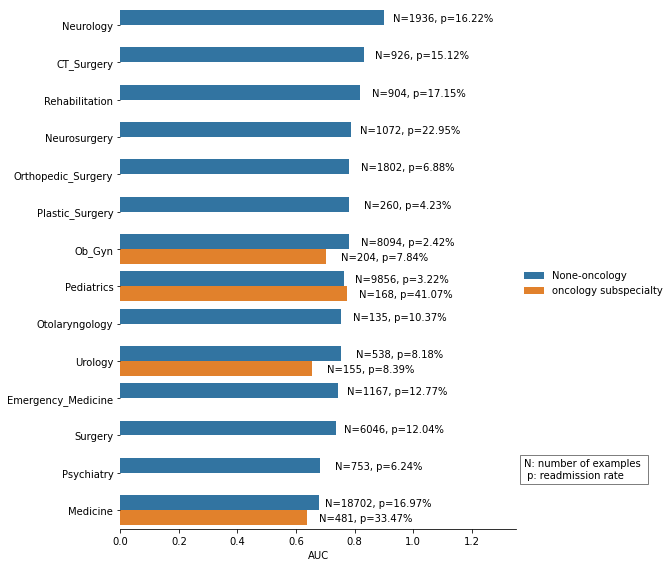

In [14]:
plt.rcParams.update({"axes.xmargin": 0.5})
g = sns.catplot(
    kind="bar",
    x=metric_name,
    y="department",
    data=plot_df,
    hue="oncology",
    orient="h",
    size=8,
)
g.despine(left=True)
g.set_axis_labels("AUC", "")
g.legend.set_title("")
print(g)
idx = 0
for ax in g.axes.ravel():
    for p in ax.patches:
        count = ann_cnts[idx]
        rate = ann_rate[idx]
        if count > 0:
            ax.annotate(
                f"N=" + str(count) + ", p=" + rate.strip(),
                (p.get_width() + 0.2, p.get_y() + 0.35),
                # (p.get_width()+0.03, p.get_y() + 0.5),
                ha="center",
                va="bottom",
                color="black",
            )
        idx += 1

t = plt.text(
    1.02,
    0.1,
    "N: number of examples \n p: readmission rate",
    wrap=True,
    transform=plt.gca().transAxes,
)
t.set_bbox(dict(facecolor="white", alpha=0.5, edgecolor="black"))
plt.savefig("plots/department_perf.png", bbox_inches="tight", dpi=100)

<Figure size 7200x2880 with 0 Axes>

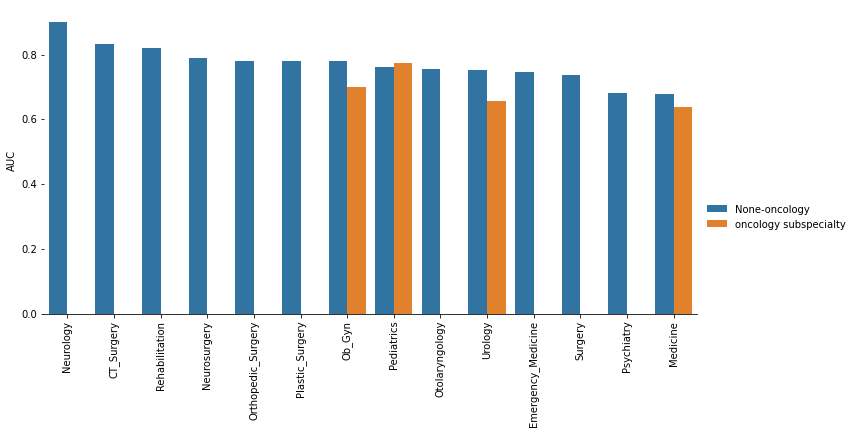

In [15]:
plt.figure(figsize=(100, 40))
g = sns.catplot(
    kind="bar",
    x="department",
    y=metric_name,
    data=plot_df,
    hue="oncology",
    orient="v",
    aspect=2,
)
g.despine(left=True)
g.set_axis_labels("", "AUC")
g.legend.set_title("")
g.set_xticklabels(rotation=90)